In [1]:
import os
import numpy as np
import pandas as pd
import cv2
#import opendatasets as od

from PIL import Image
import matplotlib.pyplot as plt
from skimage.io import imread, imshow,show
from skimage.transform import resize

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, backend
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *


In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
images_path =  os.path.join(os.getenv('HOME'), 'aiffel/dlthon/www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset/')
import json

# 파일 열기
with open(os.path.join(images_path,"COCO_motorcycle (pixel).json"), "r") as f:
    # 파일 내용 읽기
    data = json.load(f)

for item in data:
    print(item)

info
licenses
images
annotations
categories


In [4]:
# 파일 내용 출력
print(data["info"])

{'description': 'This is dataset.', 'url': 'https://superannotate.ai', 'version': '1.0', 'year': 2022, 'contributor': 'Superannotate AI', 'date_created': '15/09/2022'}


In [5]:
print(data["images"][0])

{'id': 1, 'file_name': 'night ride (8).png', 'height': 1080, 'width': 1920, 'license': 1}


In [6]:
print(data["categories"])

[{'id': 1329681, 'name': 'Rider', 'supercategory': 'Rider', 'isthing': 1, 'color': [17, 74, 20]}, {'id': 1323885, 'name': 'My bike', 'supercategory': 'My bike', 'isthing': 1, 'color': [109, 51, 20]}, {'id': 1323884, 'name': 'Moveable', 'supercategory': 'Moveable', 'isthing': 1, 'color': [108, 51, 20]}, {'id': 1323882, 'name': 'Lane Mark', 'supercategory': 'Lane Mark', 'isthing': 1, 'color': [106, 51, 20]}, {'id': 1323881, 'name': 'Road', 'supercategory': 'Road', 'isthing': 1, 'color': [105, 51, 20]}, {'id': 1323880, 'name': 'Undrivable', 'supercategory': 'Undrivable', 'isthing': 1, 'color': [104, 51, 20]}]


In [7]:
print(data["annotations"][0])

{'id': 1, 'image_id': 1, 'segmentation': [[0, 0, 0, 1, 0, 2, 0, 3, 0, 4, 0, 5, 0, 6, 0, 7, 0, 8, 0, 9, 0, 10, 0, 11, 0, 12, 0, 13, 0, 14, 0, 15, 0, 16, 0, 17, 0, 18, 0, 19, 0, 20, 0, 21, 0, 22, 0, 23, 0, 24, 0, 25, 0, 26, 0, 27, 0, 28, 0, 29, 0, 30, 0, 31, 0, 32, 0, 33, 0, 34, 0, 35, 0, 36, 0, 37, 0, 38, 0, 39, 0, 40, 0, 41, 0, 42, 0, 43, 0, 44, 0, 45, 0, 46, 0, 47, 0, 48, 0, 49, 0, 50, 0, 51, 0, 52, 0, 53, 0, 54, 0, 55, 0, 56, 0, 57, 0, 58, 0, 59, 0, 60, 0, 61, 0, 62, 0, 63, 0, 64, 0, 65, 0, 66, 0, 67, 0, 68, 0, 69, 0, 70, 0, 71, 0, 72, 0, 73, 0, 74, 0, 75, 0, 76, 0, 77, 0, 78, 0, 79, 0, 80, 0, 81, 0, 82, 0, 83, 0, 84, 0, 85, 0, 86, 0, 87, 0, 88, 0, 89, 0, 90, 0, 91, 0, 92, 0, 93, 0, 94, 0, 95, 0, 96, 0, 97, 0, 98, 0, 99, 0, 100, 0, 101, 0, 102, 0, 103, 0, 104, 0, 105, 0, 106, 0, 107, 0, 108, 0, 109, 0, 110, 0, 111, 0, 112, 0, 113, 0, 114, 0, 115, 0, 116, 0, 117, 0, 118, 0, 119, 0, 120, 0, 121, 0, 122, 0, 123, 0, 124, 0, 125, 0, 126, 0, 127, 0, 128, 0, 129, 0, 130, 0, 131, 0, 132, 0, 

In [8]:
for i in range(6):
    print(data["categories"][i]['name'],data["categories"][i]['color'])

Rider [17, 74, 20]
My bike [109, 51, 20]
Moveable [108, 51, 20]
Lane Mark [106, 51, 20]
Road [105, 51, 20]
Undrivable [104, 51, 20]


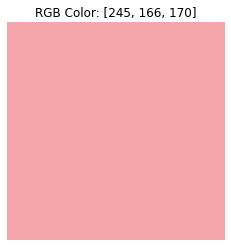

In [10]:
rgb_color = [245, 166, 170]
rgb_image = np.array(rgb_color).reshape(1, 1, 3) / 255.0

plt.imshow(rgb_image)
plt.title(f"RGB Color: {rgb_color}")
plt.axis('off')
plt.show()

In [11]:
# 클래스별 객체 수 출력

class_counts = {}
for annotation in data["annotations"]:
    class_id = annotation["category_id"]
    if class_id not in class_counts:
        class_counts[class_id] = 0
    class_counts[class_id] += 1

for class_id1, count in class_counts.items():
    for class_id2, category in enumerate(data['categories']):
        if category['id'] == class_id1:
            print(f"{category['name']}: {count}")

Undrivable: 200
Road: 200
Lane Mark: 207
Moveable: 1298
My bike: 200
Rider: 200


In [12]:
a1 = {}
for i in range(len(data["annotations"])):
    img_id = data["annotations"][i]['image_id']
    img_cat = data["annotations"][i]['category_id']
    
    if img_id not in a1:
        a1[img_id] = {img_cat: 1}
    else:
        if img_cat not in a1[img_id]:
            a1[img_id][img_cat] = 1
        else:
            a1[img_id][img_cat] += 1

In [13]:
for key, value in a1.items():
    print(key, value)

1 {1323880: 1, 1323881: 1, 1323882: 1, 1323884: 6, 1323885: 1, 1329681: 1}
2 {1323880: 1, 1323881: 1, 1323882: 1, 1323884: 7, 1323885: 1, 1329681: 1}
3 {1323880: 1, 1323881: 1, 1323882: 1, 1323884: 5, 1323885: 1, 1329681: 1}
4 {1323880: 1, 1323881: 1, 1323882: 1, 1323884: 7, 1323885: 1, 1329681: 1}
5 {1323880: 1, 1323881: 1, 1323882: 1, 1323884: 9, 1323885: 1, 1329681: 1}
6 {1323880: 1, 1323881: 1, 1323882: 1, 1323884: 7, 1323885: 1, 1329681: 1}
7 {1323880: 1, 1323881: 1, 1323882: 1, 1323884: 8, 1323885: 1, 1329681: 1}
8 {1323880: 1, 1323881: 1, 1323882: 1, 1323884: 7, 1323885: 1, 1329681: 1}
9 {1323880: 1, 1323881: 1, 1323882: 1, 1323884: 9, 1323885: 1, 1329681: 1}
10 {1323880: 1, 1323881: 1, 1323882: 1, 1323884: 6, 1323885: 1, 1329681: 1}
11 {1323880: 1, 1323881: 1, 1323882: 1, 1323884: 7, 1323885: 1, 1329681: 1}
12 {1323880: 1, 1323881: 1, 1323882: 1, 1323884: 10, 1323885: 1, 1329681: 1}
13 {1323880: 1, 1323881: 1, 1323882: 1, 1323884: 2, 1323885: 1, 1329681: 1}
14 {1323880: 1, 1323

In [14]:
# 딕셔너리 변환 작업
new_a1 = {}
for outer_key, inner_dict in a1.items():
    new_inner_dict = {}
    for num_key, value in inner_dict.items():
        for category in data["categories"]:
            if category['id'] == num_key:
                new_inner_dict[category['name']] = value
    new_a1[outer_key] = new_inner_dict

In [15]:
for key, value in new_a1.items():
    print(key, value)

1 {'Undrivable': 1, 'Road': 1, 'Lane Mark': 1, 'Moveable': 6, 'My bike': 1, 'Rider': 1}
2 {'Undrivable': 1, 'Road': 1, 'Lane Mark': 1, 'Moveable': 7, 'My bike': 1, 'Rider': 1}
3 {'Undrivable': 1, 'Road': 1, 'Lane Mark': 1, 'Moveable': 5, 'My bike': 1, 'Rider': 1}
4 {'Undrivable': 1, 'Road': 1, 'Lane Mark': 1, 'Moveable': 7, 'My bike': 1, 'Rider': 1}
5 {'Undrivable': 1, 'Road': 1, 'Lane Mark': 1, 'Moveable': 9, 'My bike': 1, 'Rider': 1}
6 {'Undrivable': 1, 'Road': 1, 'Lane Mark': 1, 'Moveable': 7, 'My bike': 1, 'Rider': 1}
7 {'Undrivable': 1, 'Road': 1, 'Lane Mark': 1, 'Moveable': 8, 'My bike': 1, 'Rider': 1}
8 {'Undrivable': 1, 'Road': 1, 'Lane Mark': 1, 'Moveable': 7, 'My bike': 1, 'Rider': 1}
9 {'Undrivable': 1, 'Road': 1, 'Lane Mark': 1, 'Moveable': 9, 'My bike': 1, 'Rider': 1}
10 {'Undrivable': 1, 'Road': 1, 'Lane Mark': 1, 'Moveable': 6, 'My bike': 1, 'Rider': 1}
11 {'Undrivable': 1, 'Road': 1, 'Lane Mark': 1, 'Moveable': 7, 'My bike': 1, 'Rider': 1}
12 {'Undrivable': 1, 'Road': 1

(1080, 1920, 3)


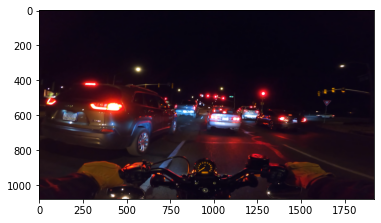

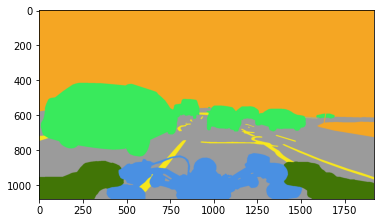

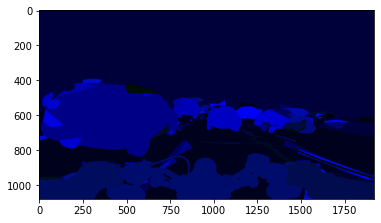

In [16]:
images_path =  os.path.join(os.getenv('HOME'), 'aiffel/dlthon/www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset/images')
img_name='/night ride (33).png'
img1 = images_path + img_name
img2 = images_path + img_name + '___fuse.png'
img3 = images_path + img_name + '___save.png'
test1 = cv2.imread(img1) 
test2 = cv2.imread(img2) 
test3 = cv2.imread(img3) 
print(test1.shape)

plt.imshow(cv2.cvtColor(test1, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(test2, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(test3, cv2.COLOR_BGR2RGB))
plt.show()

In [17]:
image = list()
fuse = list()
blue = list()

for images in os.listdir(images_path):
    if images.find('___', 0) == -1:
        image.append(os.path.join(images_path, images))
        fuse.append(os.path.join(images_path, images + '___fuse.png'))
        blue.append(os.path.join(images_path, images + '___save.png'))

In [18]:
#리스트에 저장된 파일이 올바르게 정렬되어 있는지 확인
print(image[8])
print(fuse[8])
print(blue[8])

/aiffel/aiffel/dlthon/www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset/images/Screenshot (449).png
/aiffel/aiffel/dlthon/www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset/images/Screenshot (449).png___fuse.png
/aiffel/aiffel/dlthon/www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset/images/Screenshot (449).png___save.png


In [ ]:
#정렬이 안되어 있다면 실행
'''
sorted_filenames = sorted(filenames)

# Print the sorted list of filenames
print(sorted_filenames)
'''

In [19]:
image_size = (256, 256)
image_data = {'image': [], 'mask': [], 'blue': []}
image1=[]
mask1=[]
blue1=[]
classifications = ['image', 'mask', 'blue']

for image_ in image:
    for i, img in enumerate([image_]):
        # PIL을 사용하여 이미지 열기
        img = Image.open(img)
        # 이미지 크기 조정
        img = img.resize(image_size)
        # PIL 이미지를 NumPy 배열로 변환
        img_array = np.array(img)
        if img_array.shape[-1] == 4:  # Check if RGBA image
            img_array = img_array[:, :, :3]
        # 이미지 배열을 해당 분류에 추가
        image1.append(img_array)

for  mask_ in  fuse:
    for i, img in enumerate([ mask_]):
        # PIL을 사용하여 이미지 열기
        img = Image.open(img)
        # 이미지 크기 조정
        img = img.resize(image_size)
        # PIL 이미지를 NumPy 배열로 변환
        img_array = np.array(img)
        if img_array.shape[-1] == 4:  # Check if RGBA image
            img_array = img_array[:, :, :3]
        # 이미지 배열을 해당 분류에 추가
        mask1.append(img_array)
        
for blue_ in  blue:
    for i, img in enumerate([blue_]):
        # PIL을 사용하여 이미지 열기
        img = Image.open(img)
        # 이미지 크기 조정
        img = img.resize(image_size)
        # PIL 이미지를 NumPy 배열로 변환
        img_array = np.array(img)
        if img_array.shape[-1] == 4:  # Check if RGBA image
            img_array = img_array[:, :, :3]
        # 이미지 배열을 해당 분류에 추가
        blue1.append(img_array)

In [26]:
image1 = np.array(image1)
mask1 = np.array(mask1)
blue1= np.array(blue1)

In [24]:
print(image1.shape)

(200, 256, 256, 3)


In [22]:
img = Image.open(blue[1])
print(img)

<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1920x1080 at 0x7FB3389AD0A0>


In [46]:
import numpy as np

# 주어진 라벨 맵 (mask2 배열)
label_map = mask1

# 색상과 클래스 인덱스 간의 매핑 정의
color_to_class = {
    (245, 166, 35): 0,  # 클래스 0
    (155, 155, 155): 1,  # 클래스 1
    (65, 117, 6): 2,  # 클래스 2
    (74, 144, 226): 3,  # 클래스 3
    (57, 234, 92): 4,  # 클래스 4
    (248, 231, 28): 5,  # 클래스 5
    # 필요한 만큼 색상-클래스 매핑 추가
}

# 레이블 맵을 클래스 인덱스로 인코딩
encoded_label = np.zeros((label_map.shape[0], label_map.shape[1], label_map.shape[2], 1), dtype=np.uint8)  # 형태 변경
for row in range(label_map.shape[0]):
    for col in range(label_map.shape[1]):
        for ch in range(label_map.shape[2]):
            pixel_color = tuple(label_map[row, col, ch])
            class_index = color_to_class.get(pixel_color, -1)
            if class_index != -1:
                encoded_label[row, col, ch, 0] = class_index  # 클래스 인덱스를 마지막 차원에 저장

In [47]:
mask1.shape

(200, 256, 256, 3)

In [48]:
encoded_label.shape

(200, 256, 256, 1)

In [49]:
from keras.preprocessing.image import load_img

uniques = np.empty((0,3))
#for  i in  range(309, 451):
for  i in  range(309, 312):    
    print(f'Extracting unique classes from')
    label = ""
    label= load_img(f"{images_path}/Screenshot ({i}).png___fuse.png")
    label_arr = np.array(label)
    label_reshaped = tf.reshape(label_arr, [-1, 3]).numpy()
    uniques = np.append(uniques, np.unique(label_reshaped, axis=0), axis=0)
np.unique(uniques, axis=0).shape

uniques = np.unique(uniques, axis=0)
categories = uniques.tolist()

cat_list = np.eye(len(categories))

Extracting unique classes from
Extracting unique classes from
Extracting unique classes from


In [50]:
categories

[[0.0, 0.0, 0.0],
 [57.0, 234.0, 92.0],
 [65.0, 117.0, 6.0],
 [74.0, 144.0, 226.0],
 [155.0, 155.0, 155.0],
 [245.0, 166.0, 35.0],
 [248.0, 231.0, 28.0]]

In [51]:
categories.remove([0.0, 0.0, 0.0])

In [52]:
categories

[[57.0, 234.0, 92.0],
 [65.0, 117.0, 6.0],
 [74.0, 144.0, 226.0],
 [155.0, 155.0, 155.0],
 [245.0, 166.0, 35.0],
 [248.0, 231.0, 28.0]]

In [53]:
mask1[5]

array([[[245, 166,  35],
        [245, 166,  35],
        [245, 166,  35],
        ...,
        [245, 166,  35],
        [245, 166,  35],
        [245, 166,  35]],

       [[245, 166,  35],
        [245, 166,  35],
        [245, 166,  35],
        ...,
        [245, 166,  35],
        [245, 166,  35],
        [245, 166,  35]],

       [[245, 166,  35],
        [245, 166,  35],
        [245, 166,  35],
        ...,
        [245, 166,  35],
        [245, 166,  35],
        [245, 166,  35]],

       ...,

       [[ 65, 117,   6],
        [ 65, 117,   6],
        [ 65, 117,   6],
        ...,
        [155, 155, 155],
        [155, 155, 155],
        [155, 155, 155]],

       [[ 65, 117,   6],
        [ 65, 117,   6],
        [ 65, 117,   6],
        ...,
        [155, 155, 155],
        [155, 155, 155],
        [155, 155, 155]],

       [[ 65, 117,   6],
        [ 65, 117,   6],
        [ 65, 117,   6],
        ...,
        [155, 155, 155],
        [155, 155, 155],
        [155, 155, 155]]

In [56]:
from tensorflow.keras.utils import to_categorical
num_classes = 6

# 라벨의 마지막 차원을 펼쳐서 단일 차원을 제거합니다.
labels_flattened = encoded_label.reshape((-1,))

# 라벨을 원-핫 인코딩 형식으로 변환합니다.
labels_one_hot = to_categorical(labels_flattened, num_classes=num_classes)

# 원-핫 인코딩된 라벨을 원래 형태로 다시 변환합니다.
labels_one_hot = labels_one_hot.reshape(encoded_label.shape[:-1] + (num_classes,))

In [57]:
labels_one_hot.shape

(200, 256, 256, 6)

In [58]:
#데이터를 훈련 세트와 검증 세트, 평가 세트로 나눈다.
images = image1

#원본이미지
train_images_original= images[:140]
val_images_original = images[140:170]
test_images_original = images[170:200]

#fuse이미지
images = labels_one_hot
train_images_mask= images[:140]
val_images_mask= images[140:170]
test_images_mask = images[170:200]

#블루마스크 이미지
images = blue1
train_images_blue= images[:140]
val_images_blue= images[140:170]
test_images_blue = images[170:200]

In [59]:
len(val_images_mask)

30

In [61]:
train_images_mask.shape

(140, 256, 256, 6)

In [62]:
train_images_original.shape

(140, 256, 256, 3)

In [63]:
train_images_mask.shape

(140, 256, 256, 6)

In [64]:
train_images_mask[1]

array([[[1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        ...,
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.]],

       [[1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        ...,
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.]],

       [[1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        ...,
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.]],

       ...,

       [[1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        ...,
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.]],

       [[1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        .

In [65]:
val_images_mask.shape

(30, 256, 256, 6)

In [66]:
#augmentation
import random

def augment(image,label,bluemask):
    
    value_list = [0, 1] #랜덤하게 augmentation을 하기위해 필요한 리스트
    seed = tf.random.uniform((), minval=0, maxval=1, dtype=tf.float32)
    seed_v = seed.numpy() #0~1사이의 값
    seed2 = tf.random.uniform((), minval=0, maxval=0.5, dtype=tf.float32)
    seed_v2 = seed2.numpy()#0~0.5 사이의 값
    
    #좌우뒤집기
    if random.choice(value_list) == 1:
        image = tf.image.flip_left_right(image)
        label = tf.image.flip_left_right(label)
        blue_mask = tf.image.flip_left_right(blue_mask)
        
    #밝기 조절
    if random.choice(value_list) == 1:
        image = tf.image.brightness(image, max_delta=seed_v2)
        image = tf.clip_by_value(image, 0, 1)
        label = tf.image.brightness(label, max_delta=seed_v2)
        label = tf.clip_by_value(label, 0, 1)
        blue_mask = tf.image.brightness(blue_mask, max_delta=seed_v2)
        blue_mask = tf.clip_by_value(blue_mask, 0, 1)
    
    #색조 조정
    if random.choice(value_list) == 1:
        image = tf.image.hue(image, max_delta=seed_v2)
        label = tf.image.hue(label, max_delta=seed_v2)
        blue_mask = tf.image.hue(blue_mask, max_delta=seed_v2)
        
    #중앙 기준으로 자르기
    if random.choice(value_list) == 1:
        tf.image.central_crop(image, central_fraction=seed_v)
        tf.image.central_crop(label, central_fraction=seed_v)
        tf.image.central_crop(blue_mask, central_fraction=seed_v)
        
    return image, label, bluemask

In [68]:
EPOCHS = 50
LEARNING_RATE = 1e-4
AUTOTUNE = tf.data.AUTOTUNE
BATCH_SIZE = 8

In [67]:
import keras

def build_model(img_size, num_classes):
    inputs = keras.Input(shape=img_size)

    ### [First half of the network: downsampling inputs] ###

    # Entry block
    x = keras.layers.Conv2D(32, 3, strides=2, padding="same")(inputs)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    # Blocks 1, 2, 3 are identical apart from the feature depth.
    for filters in [64, 128, 256]:
        x = keras.layers.Activation("relu")(x)
        x = keras.layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = keras.layers.BatchNormalization()(x)

        x = keras.layers.Activation("relu")(x)
        x = keras.layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = keras.layers.BatchNormalization()(x)

        x = keras.layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = keras.layers.Conv2D(filters, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = keras.layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    ### [Second half of the network: upsampling inputs] ###

    for filters in [256, 128, 64, 32]:
        x = keras.layers.Activation("relu")(x)
        x = keras.layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = keras.layers.BatchNormalization()(x)

        x = keras.layers.Activation("relu")(x)
        x = keras.layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = keras.layers.BatchNormalization()(x)

        x = keras.layers.UpSampling2D(2)(x)

        # Project residual
        residual = keras.layers.UpSampling2D(2)(previous_block_activation)
        residual = keras.layers.Conv2D(filters, 1, padding="same")(residual)
        x = keras.layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    # Add a per-pixel classification layer
    if num_classes == 1:
        outputs = keras.layers.Conv2D(num_classes, 1, activation="sigmoid", padding="same")(x)
    else : 
        outputs = keras.layers.Conv2D(num_classes, 1, activation="softmax", padding="same")(x)

    # Define the model
    model = Model(inputs, outputs)
    return model

In [69]:
model = build_model(img_size=(256, 256,3), num_classes=6)

model.compile(
    optimizer='adam',
    loss="categorical_crossentropy",
    metrics=['accuracy']
)

In [70]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 128, 128, 32) 128         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 128, 128, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [71]:
train_images_original.shape

(140, 256, 256, 3)

In [72]:
history = model.fit(
        x = train_images_original,
        y = train_images_mask,
        validation_data=(val_images_original,val_images_mask),
        steps_per_epoch=len(train_images_original),
        epochs=EPOCHS,
    )

Epoch 1/50
140/140 [==============================] - 30s 39ms/step - loss: 1.4189 - accuracy: 0.6660 - val_loss: 2.5497 - val_accuracy: 0.4941
Epoch 2/50
140/140 [==============================] - 4s 25ms/step - loss: 0.6356 - accuracy: 0.7743 - val_loss: 2.6212 - val_accuracy: 0.5120
Epoch 3/50
140/140 [==============================] - 4s 25ms/step - loss: 0.5156 - accuracy: 0.8095 - val_loss: 1.8238 - val_accuracy: 0.5390
Epoch 4/50
140/140 [==============================] - 4s 26ms/step - loss: 0.4440 - accuracy: 0.8328 - val_loss: 1.2796 - val_accuracy: 0.5963
Epoch 5/50
140/140 [==============================] - 4s 26ms/step - loss: 0.3918 - accuracy: 0.8516 - val_loss: 1.0225 - val_accuracy: 0.6455
Epoch 6/50
140/140 [==============================] - 4s 26ms/step - loss: 0.3793 - accuracy: 0.8551 - val_loss: 1.1044 - val_accuracy: 0.6482
Epoch 7/50
140/140 [==============================] - 4s 26ms/step - loss: 0.3280 - accuracy: 0.8734 - val_loss: 0.7948 - val_accuracy: 0.730

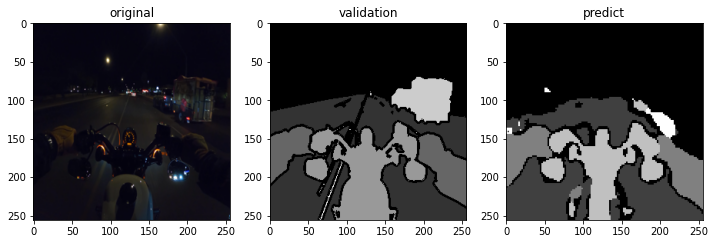

In [89]:
import matplotlib.pyplot as plt

def decode_and_visualize(images, masks, model):
    # 모델을 사용하여 마스크 예측
    predicted_masks = model.predict(images)
    
    # 시각화할 랜덤한 인덱스 선택
    index = np.random.randint(0, len(images))
    
    # 원본 이미지
    original_image = images[index]
    
    # 실제 마스크
    true_mask = masks[index]
    
    # 예측된 마스크
    predicted_mask = predicted_masks[index]
    
    # 원본 이미지 출력
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(original_image)
    plt.title('original')
    
    # 실제 마스크 출력
    plt.subplot(1, 3, 2)
    plt.imshow(true_mask.argmax(axis=-1), cmap='gray')
    plt.title('validation')
    
    # 예측된 마스크 출력
    plt.subplot(1, 3, 3)
    plt.imshow(predicted_mask.argmax(axis=-1), cmap='gray')
    plt.title('predict')
    
    plt.show()

# 랜덤한 예제를 시각화하기 위해 함수 호출
decode_and_visualize(val_images_original, val_images_mask, model)